<a href="https://colab.research.google.com/github/hasanocal7/Kur_3/blob/main/Linear_%26_Non_Linear_Models_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from mlxtend.plotting import plot_decision_regions

In [3]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           flip_y=0.2,
                           random_state=42,
                           n_informative=2,
                           n_redundant=0)

<Axes: >

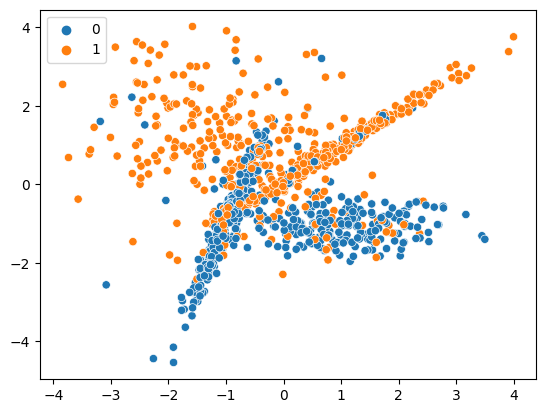

In [5]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)

In [15]:
max_depth = None
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(max_depth=max_depth)

In [16]:
lr_model.fit(X, y)
dt_model.fit(X, y)

DecisionTreeClassifier()

Text(0.5, 1.0, 'DT MODEL // max_depth: None')

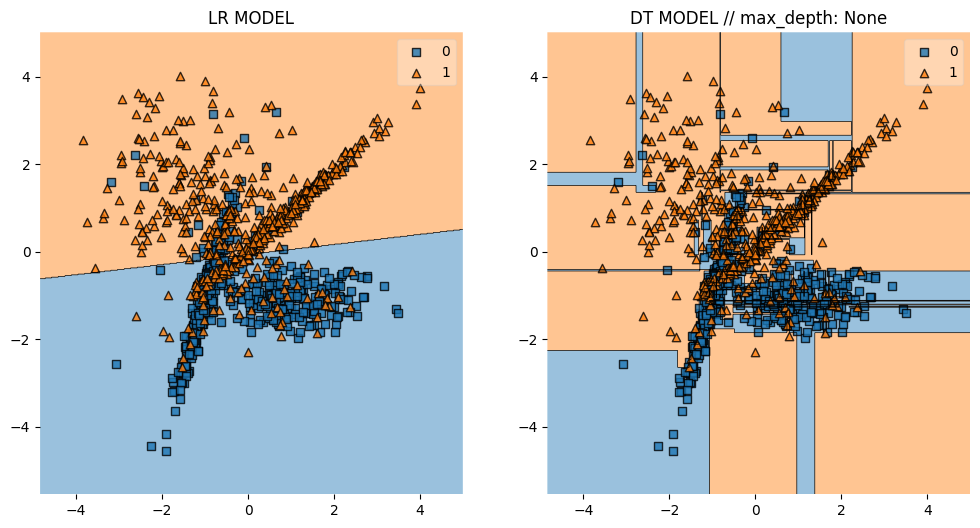

In [17]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(X, y, lr_model)
plt.title("LR MODEL")

plt.subplot(1, 2, 2)
plot_decision_regions(X, y, dt_model)
plt.title(f"DT MODEL // max_depth: {max_depth}")

Overfitting : Ml işleminde öğrenmemesi gereken değerlerin de içerisine katılması

# Gradient Boosting Model

In [35]:
X = np.linspace(0, 10, 10)
y = 2 * X + 1 + np.random.randn(10)

*Sınıflandırma:
50 tane kedi resmi,
50 tane köpek resmi,
Öğrenmeyen Model Senaryosu: %50 başarı olur (yaklaşık)

*Regresyon:
Karşılık gelen y değerleri sürekli değerler,
y değerlerinin ortalamasını alalım




In [36]:
y

array([ 0.82025314,  5.16570352,  4.77273264,  7.17199898,  9.44410273,
       11.51860455, 13.58238395, 17.00512257, 18.08129964, 19.69564938])

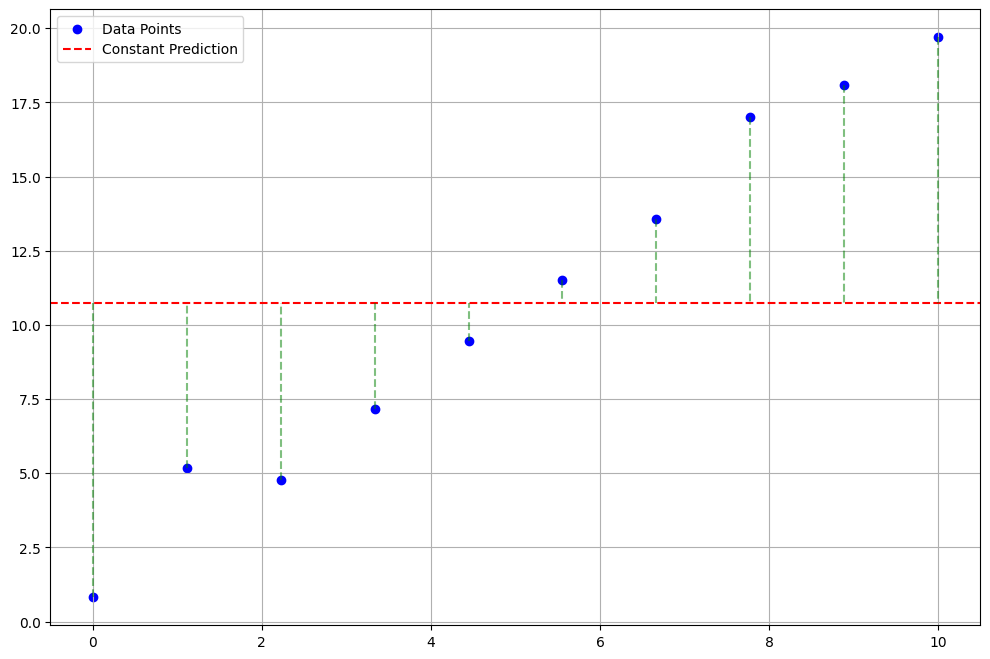

In [37]:
# Residual

plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = "blue", label = "Data Points")
plt.axhline(y.mean(), color = "red", label = "Constant Prediction",
            linestyle = "--")

for x_i, y_i in zip(X, y):
    plt.plot([x_i, x_i], [y_i, y.mean()], alpha = 0.5, linestyle = "--", color = "green")

plt.legend()
plt.grid(True)
plt.show()

# Weak Learner Yaklaşımı ve GB Temel Mantığı
--> Weak Learning bir eğitim stratejisidir.

--> Gradient Boosting'in temel mantığı, zayıf ağaçlar (weak learner) üretip bu ağaçların hatalarını başka ağaçlar ile kapatmaya çalışmaktır. Bu nedenden ötürü bu yaklaşım, ensemble model olarak nitelendirilir.

--> Ağaçlar sıra ile oluşturulup, bir sonraki gelen ağaç öncekinin bilemediği noktalara bakıp daha iyi tahmin yapmaya çalışır.

--> Ardışık gelen ağaçlar, birbirlerinin bilemediği noktalara odaklanır. RandomForesttan ayrılan en önemli özellik budur.

In [71]:
X, y = make_regression(n_samples = 1000, n_features = 1, random_state = 42, noise = 20)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

In [81]:

def fit_simple_gbr(X, y, learning_rate, max_depth, n_estimators):

    mean_target = y.mean()
    boosted_predictions = mean_target
    trees = []

    for _ in range(n_estimators):
        residuals = y - boosted_predictions
        dt_model = DecisionTreeRegressor(max_depth = max_depth,
                                          random_state = 42)
        dt_model.fit(X, residuals)
        current_preds = dt_model.predict(X)
        boosted_predictions += current_preds * learning_rate
        trees.append(dt_model)

    return mean_target, trees

In [82]:
def predict_simple_gbr(X, mean_target, trees, learning_rate):

    boosted_predictions = mean_target
    for tree in trees:
        boosted_predictions += tree.predict(X) * learning_rate
    return boosted_predictions

In [83]:
gb_model = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=2,
                                     random_state = 42)

rf_model = RandomForestRegressor(n_estimators=100,
                                     max_depth=2,
                                     random_state = 42)

In [84]:
gb_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)

mean_target, trees = fit_simple_gbr(X = X_train,
                                    y = y_train,
                                    learning_rate = 0.1,
                                    max_depth = 2,
                                    n_estimators=100)

In [85]:
gb_preds = gb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

simple_gb_preds = predict_simple_gbr(X_test, mean_target, trees, learning_rate=0.1)

In [86]:
from sklearn.metrics import mean_squared_error as mse

In [87]:
mse(y_test, gb_preds)

444.1806020865383

In [88]:
mse(y_test, simple_gb_preds)

444.1806020865383

In [89]:
mse(y_test, rf_preds)

433.3149778175505